# Visualiza the results

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:

# Load data from result_backup.txt
data = pd.read_csv('result.txt', sep=',', names=['data', 'completeness', 'correctness', 'runtime'])

# Function to convert 'runtime' format to seconds
def convert_to_seconds(time_str):
    # Extract the time part after ': '
    time_part = time_str.split(': ')[1]
    # Convert to timedelta, then to seconds
    time_seconds = pd.to_timedelta(time_part).total_seconds()
    return time_seconds

# Apply the function to the 'runtime' column
data['runtime'] = data['runtime'].apply(convert_to_seconds)
# Remove '%' from 'completeness' and 'correctness' and convert them to floats
data['completeness'] = data['completeness'].str.replace('%', '').astype(float)
data['correctness'] = data['correctness'].str.replace('%', '').astype(float)


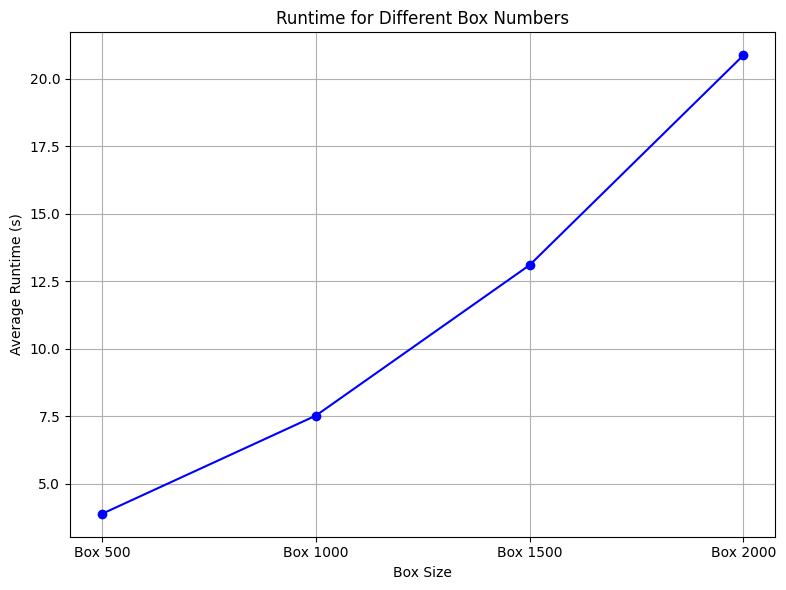

In [29]:
# # Ensure all values in 'completeness' and 'correctness' are strings
# data['completeness'] = data['completeness'].astype(str)
# data['correctness'] = data['correctness'].astype(str)

# Group by 'data' and calculate average of each metric
grouped_data = data.groupby('data').mean().reset_index()

# Separate 'Generated' and 'Noise' data for specific plotting
generated_data = grouped_data[grouped_data['data'].str.contains('Generated')]
noise_data = grouped_data[grouped_data['data'].str.contains('Noise')]

# Set x-axis labels for 'Generated' and 'Noise' data
generated_labels = ['Box 500', 'Box 1000', 'Box 1500', 'Box 2000']
noise_labels = ['Noise 1%', 'Noise 2%', 'Noise 5%', 'Noise 10%']

# Plot for Generated data: Box Size vs Runtime
plt.figure(figsize=(8, 6))
plt.plot(generated_labels, generated_data['runtime'], marker='o', color='b')
plt.xlabel('Box Size')
plt.ylabel('Average Runtime (s)')
plt.title('Runtime for Different Box Numbers')
plt.grid()
plt.tight_layout()
plt.savefig("graph/runtime_vs_box_size.png", dpi=600)

plt.show()

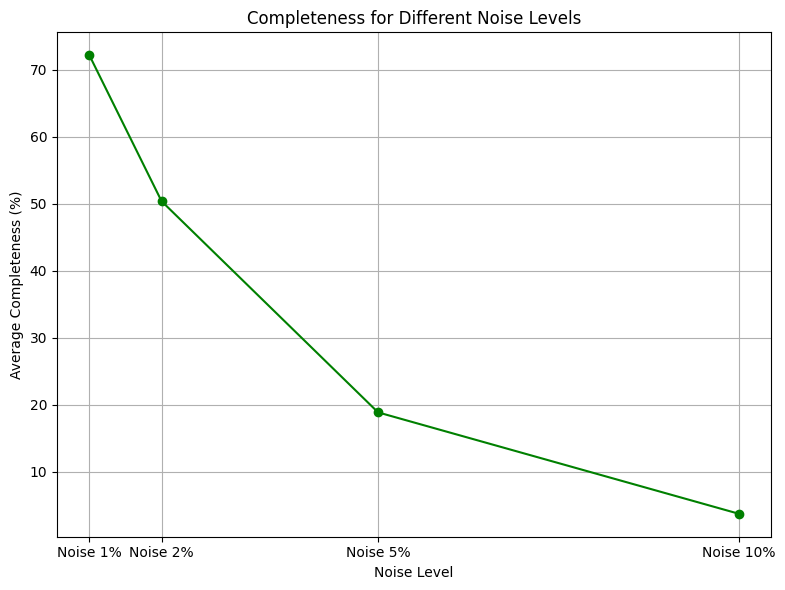

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Custom x-tick labels
custom_labels = ["Noise 1%", "Noise 2%", "Noise 5%", "Noise 10%"]

# Completeness vs Noise Level
plt.figure(figsize=(8, 6))
plt.plot(noise_data['noise_level'], noise_data['completeness'], marker='o', color='g')
plt.title('Completeness for Different Noise Levels')
plt.xlabel('Noise Level')
plt.ylabel('Average Completeness (%)')
plt.grid()
plt.xticks([1, 2, 5, 10], custom_labels)
plt.tight_layout()
plt.savefig("graph/completeness_vs_noise.png", dpi=600)

plt.show()


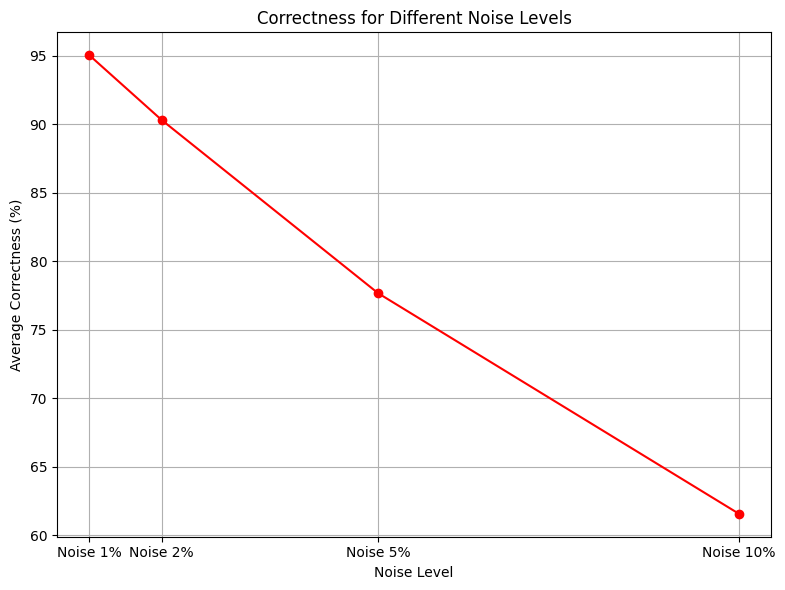

In [21]:

# Correctness vs Noise Level
plt.figure(figsize=(8, 6))
plt.plot(noise_data['noise_level'], noise_data['correctness'], marker='o', color='r')
plt.title('Correctness for Different Noise Levels')
plt.xlabel('Noise Level')
plt.ylabel('Average Correctness (%)')
plt.grid()
plt.xticks([1, 2, 5, 10], custom_labels)
plt.tight_layout()
plt.savefig("graph/correctness_vs_noise.png", dpi=600)
plt.show()


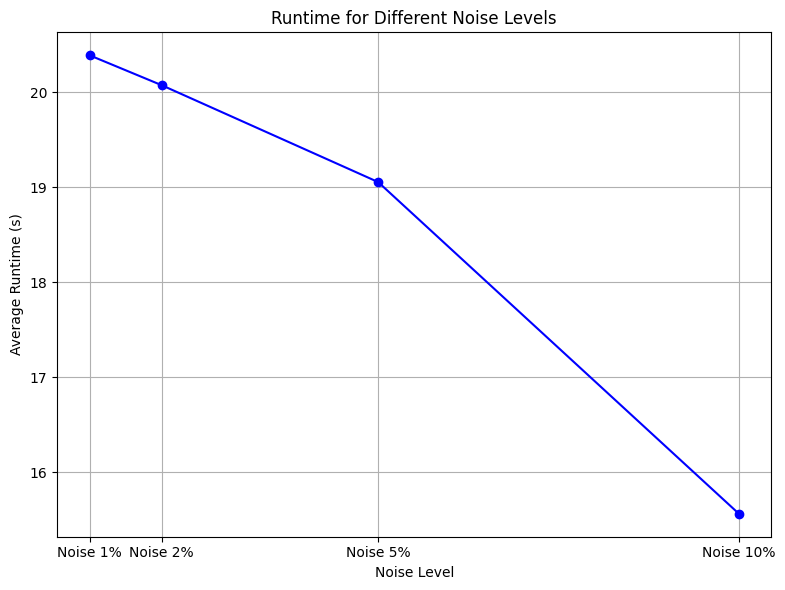

In [20]:

# Runtime vs Noise Level
plt.figure(figsize=(8, 6))
plt.plot(noise_data['noise_level'], noise_data['runtime'], marker='o', color='b')
plt.title('Runtime for Different Noise Levels')
plt.xlabel('Noise Level')
plt.ylabel('Average Runtime (s)')
plt.grid()
plt.xticks([1, 2, 5, 10], custom_labels)
plt.tight_layout()
plt.savefig("graph/runtime_vs_noise.png", dpi=600)

plt.show()
